# Step 0: Install Requirements
Run the three cells below to download/install necessary components

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 13286, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 13286 (delta 67), reused 80 (delta 61), pack-reused 13188
Receiving objects: 100% (13286/13286), 12.05 MiB | 25.93 MiB/s, done.
Resolving deltas: 100% (9240/9240), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 145 kB 5.3 MB/s 
     |████████████████████████████████| 178 kB 44.1 MB/s 
     |████████████████████████████████| 1.1 MB 34.7 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 138 kB 61.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-

In [ ]:
!git clone https://github.com/AllenDowney/ThinkDSP.git 

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2469, done.


In [ ]:
!pip install pydub

It is important to upload the trained weight in the yolo folder

#Step 1: Run Detect.py  With Trained Weights
Run YOLO Detect.py with provided trained weight in the zip folder under `trained weight` folder

`best_fourth_pass.pt` is recommended

IMPORTANT: 
1. replace detect.py line 164 to the following
```
f.write(str(int(xyxy[0]))+' '+str(int(xyxy[1]))+' '+str(int(xyxy[2]))+' '+str(int(xyxy[3]))+' ')
```
2. Upload the image of the sheet music inside yolo folder and update `--source your_image.png` to match your uploaded file

In [ ]:
!python detect.py --save-txt --weights best_fourth_pass.pt --img 640 --conf 0.25 --source your_image.png

detect: weights=['best_fourth_pass.pt'], source=morning.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/morning.png: 608x640 22 heads, Done. (0.334s)
Speed: 2.1ms pre-process, 333.8ms inference, 8.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3
1 labels saved to runs/detect/exp3/labels


# Step 2: Modify paths
1. updated `image_path` to your uploaded image
2. updated `dir` in the cell below to the `your_image.txt` file saved from `detect.py`

In [ ]:
image_path = "/content/yolov5/morning.png"
dir = "/content/yolov5/runs/detect/exp/labels/your_image.txt"

# Step 3: Pitch Detection
Run all the cells in this section to get a list of strings containing note pitch in order

In [ ]:
import numpy as np
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import imshow

def parser(content_list):
  # input a list for strings, multiple of 4
  # ouput a list of ndarray, each 2 by 2, size of len(content_list)/4
  # each col of the ndarray is a point in pic
  # first col, top left point
  # second col, bottom right point
  # each ndarray corresponds to one detection
  point_list = []
  i = 0
  while i < len(content_list)-4:
    point_list.append(np.array([[int(content_list[i+1]), int(content_list[i+3])], [int(content_list[i]), int(content_list[i+2])]]))
    i = 4+i
  return point_list

my_file = open(dir, "r")
content = my_file.read()
content_list = content.split(" ")
my_file.close()
point_list = parser(content_list)

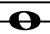

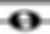

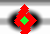

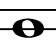

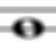

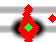

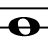

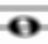

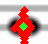

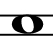

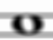

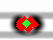

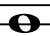

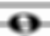

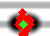

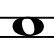

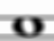

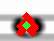

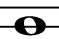

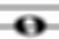

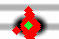

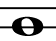

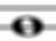

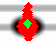

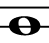

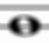

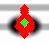

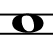

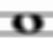

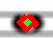

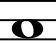

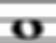

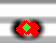

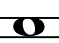

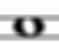

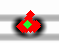

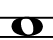

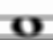

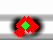

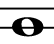

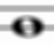

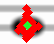

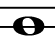

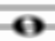

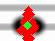

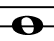

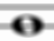

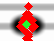

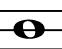

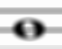

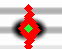

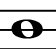

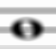

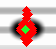

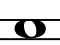

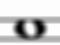

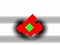

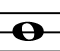

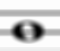

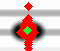

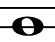

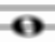

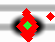

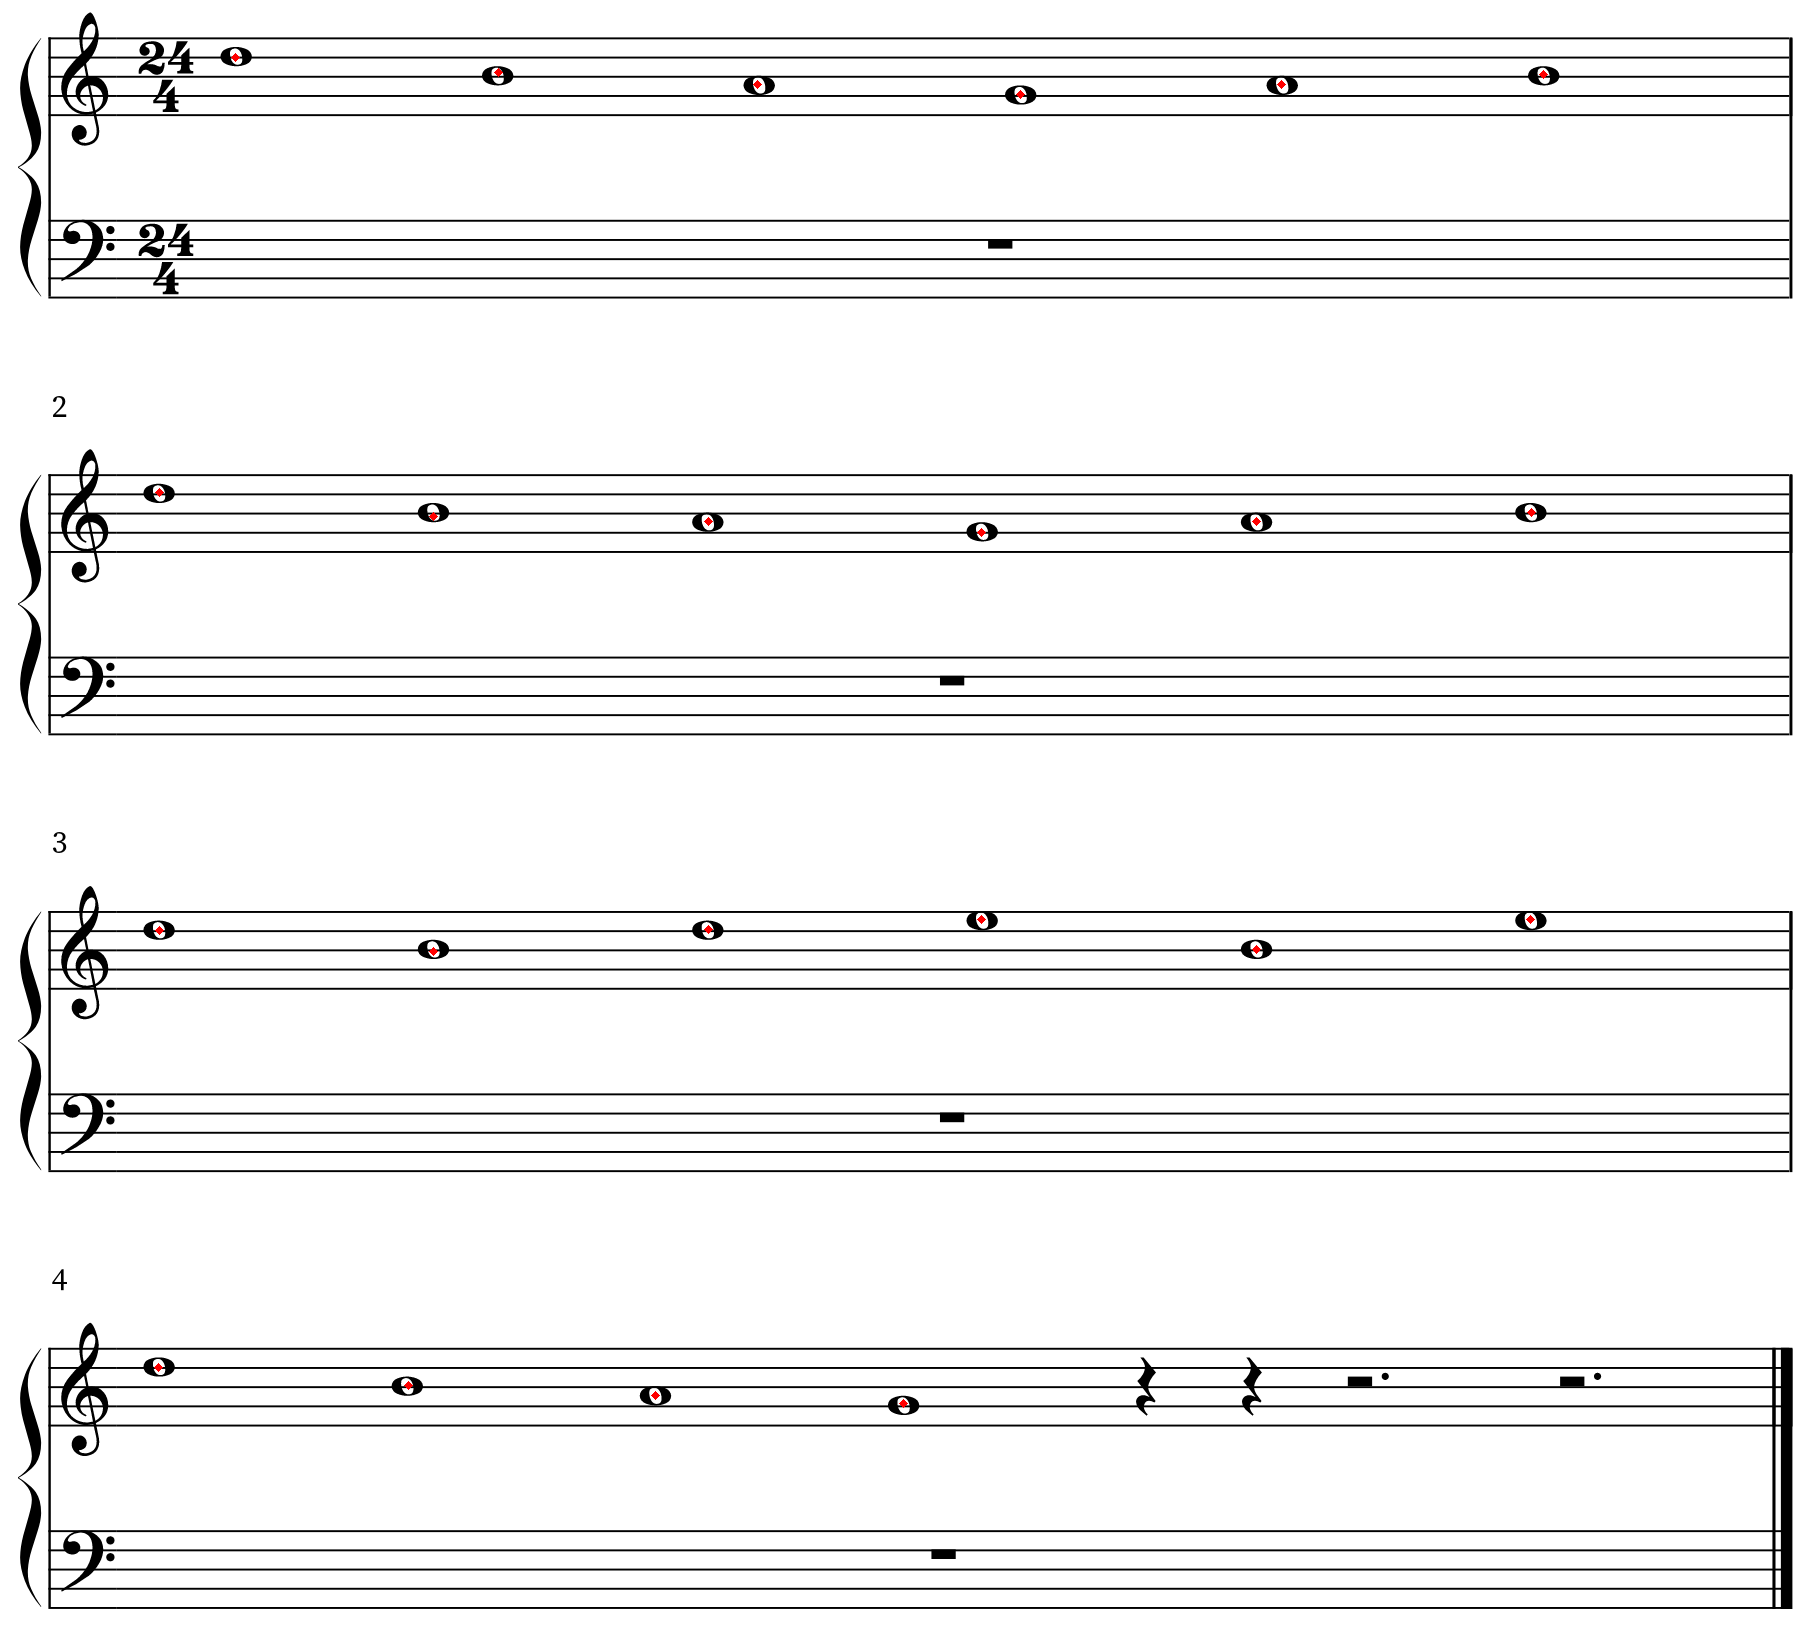


The positions of all notes are:
[[1367.  158.]
 [ 930.  159.]
 [ 492.  159.]
 [  57.  235.]
 [1385.  408.]
 [ 951.  433.]
 [ 516.  433.]
 [  72.  498.]
 [1395.  655.]
 [ 521.  708.]
 [ 929.  708.]
 [  84.  757.]
 [1403.  903.]
 [ 532.  981.]
 [ 919.  981.]
 [  94. 1020.]
 [ 521. 1256.]
 [ 949. 1256.]
 [  84. 1281.]
 [ 919. 1530.]
 [ 512. 1531.]
 [  74. 1543.]]


In [ ]:
import matplotlib.pyplot as plt 
import PIL
import numpy as np

# Read Images (img is a 2-d array of intensities)
an_image = PIL.Image.open(image_path)

I = an_image.convert("L")
I = np.asarray(I)
edges = cv2.Canny(I,100,200)


note_pos = np.zeros((len(point_list), 2))

# for each bounding box, extract the image
# run hough tranformation on it
# average all the points
# this will give you the center of the note
for i in range(len(point_list)):
  current_edge = edges[point_list[i][0, 0]:point_list[i][0, 1], point_list[i][1, 0]:point_list[i][1, 1]]
  current_image = I[point_list[i][0, 0]:point_list[i][0, 1], point_list[i][1, 0]:point_list[i][1, 1]]
  current_shot = cv2.GaussianBlur(current_image,(7,7),cv2.BORDER_DEFAULT)
  circles = cv2.HoughCircles(current_shot,cv2.HOUGH_GRADIENT,1,1,
                            param1=300,param2=12,minRadius=0,maxRadius=-1)
  y_index = np.average(circles[0][:,1])
  x_index = np.average(circles[0][:,0])
  coord = np.around(np.array([point_list[i][0, 0]+y_index, point_list[i][1, 0]+x_index])) # coord is in y and x
  note_pos[i,0] = point_list[i][0, 0]+y_index
  note_pos[i,1] = point_list[i][1, 0]+x_index

  circles = np.uint16(np.around(circles))

  cimg = cv2.cvtColor(current_shot,cv2.COLOR_GRAY2BGR)
  for i in circles[0,:]:
      # draw the center of the circle
      cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
      cv2.circle(cimg,(x_index,y_index),2,(47,249,36),3)
  print()
  
  cv2_imshow(current_image)
  print()
  cv2_imshow(current_shot)
  print()
  cv2_imshow(cimg)



note_pos = note_pos[note_pos[:, 1].argsort()]
note_pos = np.around(note_pos)
note_pos.astype(int)
cimg = cv2.cvtColor(I,cv2.COLOR_GRAY2BGR)
for i in range(note_pos.shape[0]):
    # draw the center of the circle
    cv2.circle(cimg,(int(note_pos[i,1]), int(note_pos[i,0])),2,(0,0,255),3)
print()
cv2_imshow(cimg)

print("\nThe positions of all notes are:")
print(note_pos)

Debug Note

If an error occurs when detection five lines, check the displaced slice below. If the slice does not strickly contain only lines, change `n` to a number other than 3, `n` $\in [0, \text{note_pos.shape[0]}]$. Test a few different `n` until a slice that only has lines is produced.

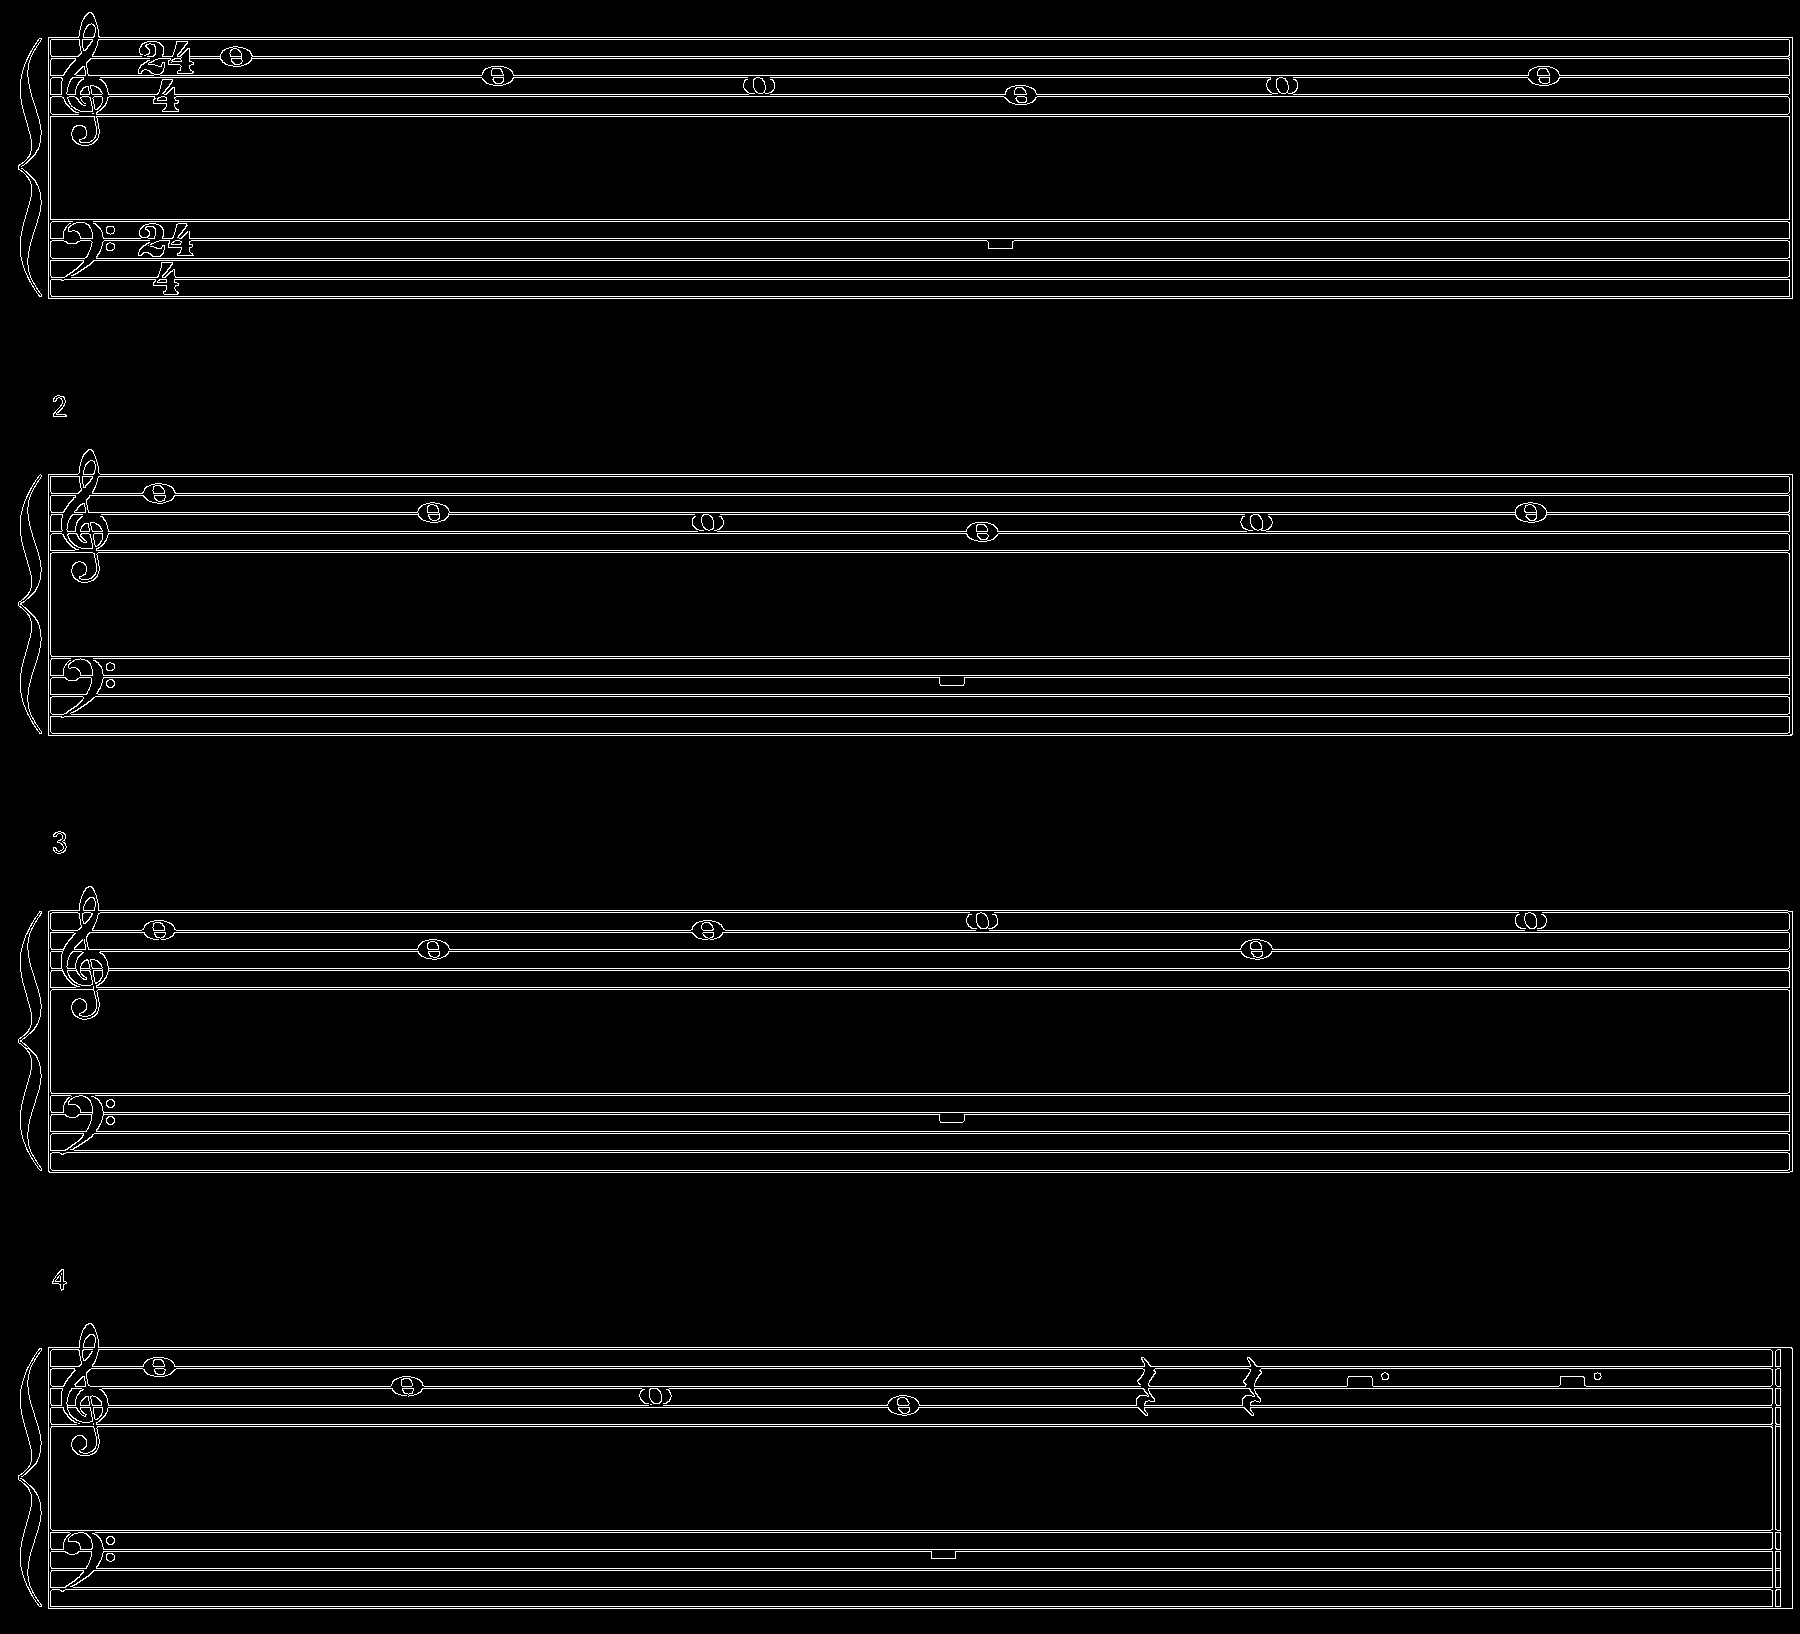

In [ ]:
n = 3
poke_pos = int((note_pos[n+1,1]-note_pos[n,1])/2+note_pos[n,1])
cv2_imshow(edges[:,poke_pos-10:poke_pos+10])

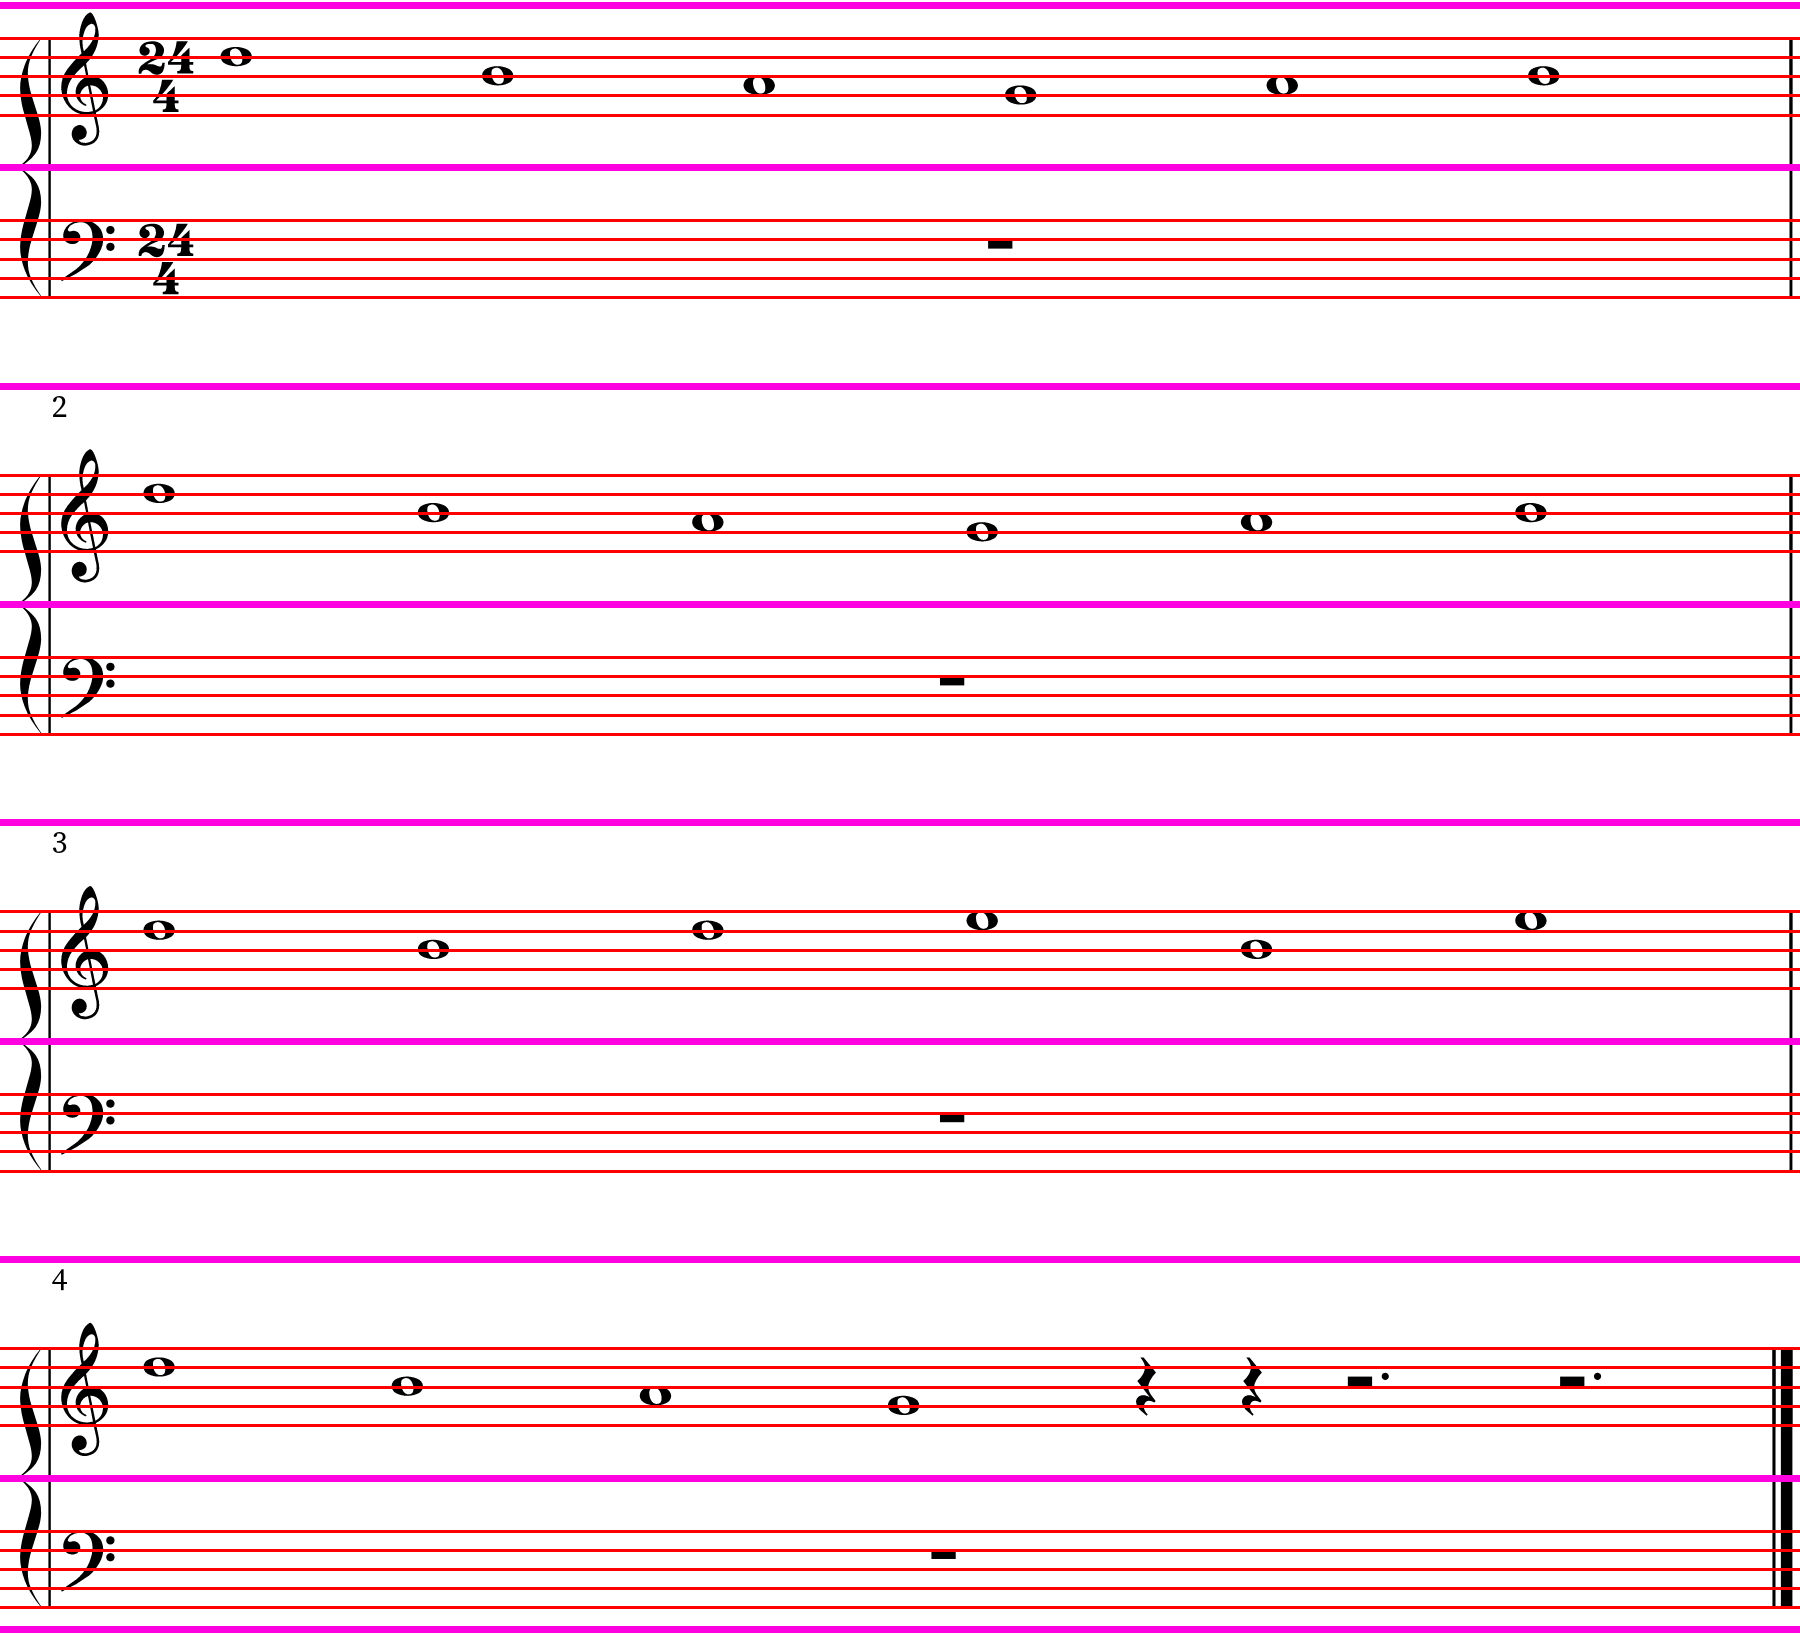


Found line locations
[38, 57, 76, 95, 115, 220, 239, 259, 278, 297, 475, 494, 513, 532, 551, 657, 676, 695, 715, 734, 911, 931, 950, 969, 988, 1094, 1113, 1132, 1151, 1171, 1348, 1367, 1387, 1406, 1425, 1531, 1550, 1569, 1588, 1607]
40
[array([ 38,  57,  76,  95, 115]), array([220, 239, 259, 278, 297]), array([475, 494, 513, 532, 551]), array([657, 676, 695, 715, 734]), array([911, 931, 950, 969, 988]), array([1094, 1113, 1132, 1151, 1171]), array([1348, 1367, 1387, 1406, 1425]), array([1531, 1550, 1569, 1588, 1607])]
[5, 167, 386, 604, 822, 1041, 1259, 1478, 1629]


In [ ]:
vertical_slice = edges[:,poke_pos]

pre_line = -1
first_line = True
linelist = []
for j in range(vertical_slice.shape[0]):
  if vertical_slice[j] == 255 and pre_line <= 0 and first_line:
    # this is the first edge
    pre_line = j
    first_line = False
  elif vertical_slice[j] == 255:
    # this is the second edge
    linelist.append(int((pre_line+j)/2))
    first_line = True
    pre_line = -1


# grouping
pre_avg_dis = (linelist[1]-linelist[0])
grouped = []

for i in range(1, len(linelist)-1):
  curr_avg_dis = (linelist[i+1]-linelist[i])
  if pre_avg_dis - curr_avg_dis > 10:
    grouped.append(np.array([linelist[i-5],linelist[i-4],linelist[i-3],linelist[i-2],linelist[i-1]]))
  pre_avg_dis = curr_avg_dis

grouped.append(np.array([linelist[len(linelist)-1-4],linelist[len(linelist)-1-3],linelist[len(linelist)-1-2],linelist[len(linelist)-1-1],linelist[len(linelist)-1]]))


# section limit
limit = []
limit.append(5)
for i in range(len(grouped)):
  if i != len(grouped)-1:
    limit.append(int((grouped[i][-1]+grouped[i+1][0])/2))
limit.append(int(I.shape[0]-5))

cimg = cv2.cvtColor(I,cv2.COLOR_GRAY2BGR)
for i in range(len(linelist)):
  cv2.line(cimg, (0, linelist[i]), (I.shape[1], linelist[i]), (0, 0, 255), thickness=2)

for i in range(len(limit)):
  cv2.line(cimg, (0, limit[i]), (I.shape[1], limit[i]), (225, 0, 255), thickness=5)
cv2_imshow(cimg)

print("\nFound line locations")
print(linelist)
print(len(linelist))
print(grouped)
print(limit)


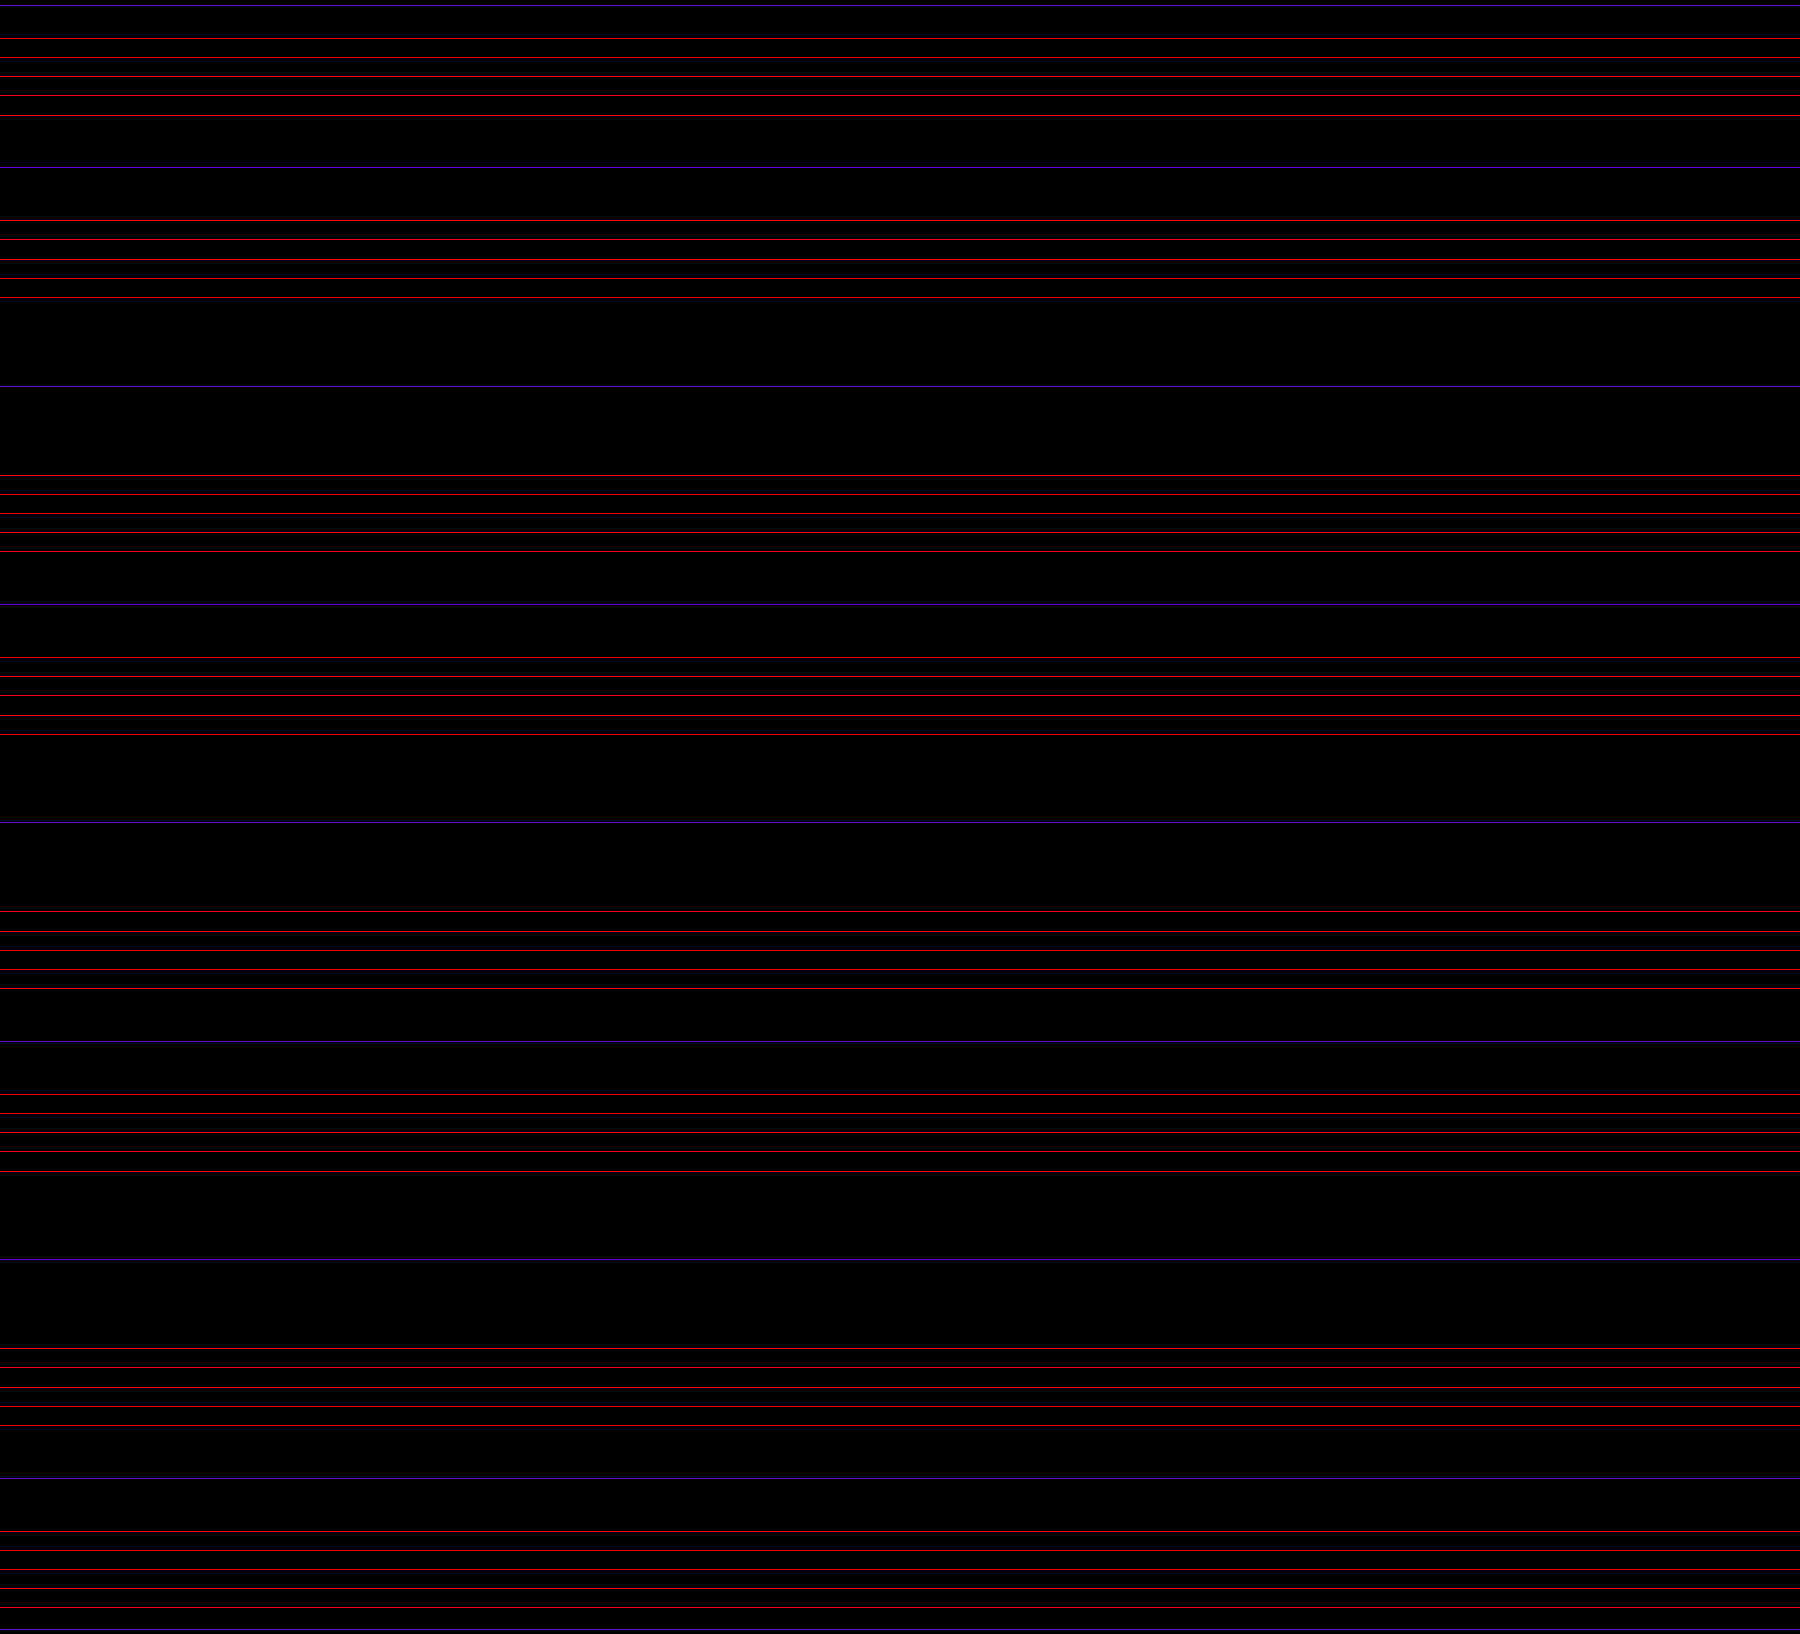

In [ ]:
# we put what we detected into a new image
J = np.zeros((I.shape[0],I.shape[1],3), np.uint8)
cimg = J
for i in range(len(linelist)):
  cv2.line(cimg, (0, linelist[i]), (I.shape[1], linelist[i]), (0, 0, 255), thickness=1)
#for i in range(note_pos.shape[0]):
#    # draw the center of the circle
#    cv2.circle(cimg,(int(note_pos[i,1]), int(note_pos[i,0])),2,(0,0,255),3)
for i in range(len(limit)):
  cv2.line(cimg, (0, limit[i]), (I.shape[1], limit[i]), (220, 0, 100), thickness=1)
cv2_imshow(cimg)
detect = cimg

In [ ]:
def pitch_finder(nd_pos, image, limit):
  # takes in an ndarray of size (1,2) and the image
  id = int(nd_pos[0])
  inrange = False
  this_range = []

  # check in the range
  # store the top of the range in the first element
  # store the bottom of the range in the second element
  for j in range(len(limit)-1):
    if limit[j] < id and id < limit[j+1]:
      this_range.append(limit[j])
      this_range.append(limit[j+1])
  
  # start to count line, from note downward
  lines_counted_downward = []
  for i in range(id, this_range[1]):
    #print(len(lines_counted_downward), image[i, int(nd_pos[1])][0], lines_counted_downward)
    # print(image[i, int(nd_pos[1])])
    if image[i, int(nd_pos[1])][2] != 0 and len(lines_counted_downward) == 0:
      # hit the first line
      # check how far, if greater than 10, count
      if abs(id-i) <= 5:
        lines_counted_downward.append((i, True))
      else:
        lines_counted_downward.append((i, False))
    elif image[i, int(nd_pos[1])][2] != 0:
      # hit another line, add to list
      lines_counted_downward.append((i, False))
  
  i = 0
  # start to count line, from note upward
  lines_counted_upward = []
  for i in range(id, this_range[0], -1):
    # print("test")
    # print(len(lines_counted_upward), image[i, int(nd_pos[1])][0], lines_counted_upward)
    # print(image[i, int(nd_pos[1])])
    if image[i, int(nd_pos[1])][2] != 0 and len(lines_counted_upward) == 0:
      # hit the first line
      # check how far, if greater than 10, count
      if abs(id-i) <= 5:
        lines_counted_upward.append((i, True))
      else:
        lines_counted_upward.append((i, False))
    elif image[i, int(nd_pos[1])][2] != 0:
      # hit another line, add to list
      lines_counted_upward.append((i, False))

  if len(lines_counted_downward) == 0 or len(lines_counted_upward) == 0:
    # consider the scenario that 0 lines are counted
    if len(lines_counted_upward)!= 0:
      if not lines_counted_upward[0][1]:
        # there are lines above and note is not near the first upward line
        return "D4"
      else:
        # there are lines above and note is near the first upward line
        return "E4"
    else:
      if len(lines_counted_downward)!= 0 and not lines_counted_downward[0][1]:
        return "G5"
      if len(lines_counted_downward)!= 0 and lines_counted_downward[0][1]:
        return "F5"
  else:
    if lines_counted_downward[0][1] or lines_counted_upward[0][1]:
      # on a line
      if lines_counted_downward[0][1]:
        if len(lines_counted_downward) == 1:
          #return 329.63
          return "E4"
        if len(lines_counted_downward) == 2:
          #return 392.00
          return "G4"
        if len(lines_counted_downward) == 3:
          #return 493.88
          return "B4"
        if len(lines_counted_downward) == 4:
          #return 587.33
          return "D5"
        if len(lines_counted_downward) == 5:
          #return 698.46
          return "F5"
      else:
        if len(lines_counted_downward) == 0:
          #return 329.63
          return "E4"
        if len(lines_counted_downward) == 1:
          #return 329.63
          return "G4"
        if len(lines_counted_downward) == 2:
          #return 329.63
          return "B4"
        if len(lines_counted_downward) == 3:
          #return 329.63
          return "D5"
        if len(lines_counted_downward) == 4:
          #return 329.63
          return "F5"
    else:
      # not on a line
      if len(lines_counted_downward) == 0:
        #return 293.66
        return "D4"
      if len(lines_counted_downward) == 1:
        #return 349.23
        return "F4"
      if len(lines_counted_downward) == 2:
        #return 440.00
        return "A4"
      if len(lines_counted_downward) == 3:
        #return 523.00
        return "C5"
      if len(lines_counted_downward) == 4:
        #return 659.26
        return "E5"
      if len(lines_counted_downward) == 4:
        #return 783.99
        return "G5"


# need to regroup all the notes to meet line by line left to right
note_pos_updated = []
for i in range(len(limit)-1):
  note_pos_updated.append([])



for i in range(len(note_pos)):
  for j in range(0, len(limit)-1):
    if note_pos[i, 0] > limit[j] and note_pos[i, 0] < limit[j+1]:
      note_pos_updated[j].append(note_pos[i])

final_note_pos = np.concatenate(note_pos_updated[0], axis=0).reshape(len(note_pos_updated[0]), 2)

for i in range(1, len(note_pos_updated)):
  if len(note_pos_updated[i])!= 0:
    final_note_pos = np.vstack((final_note_pos, np.concatenate(note_pos_updated[i], axis=0).reshape(len(note_pos_updated[i]), 2)))


print(final_note_pos)
notes = []
for i in range(len(final_note_pos)):
  notes.append(pitch_finder(final_note_pos[i,:], detect, limit))
print(notes)

[[  57.  235.]
 [  72.  498.]
 [  84.  757.]
 [  94. 1020.]
 [  84. 1281.]
 [  74. 1543.]
 [ 492.  159.]
 [ 516.  433.]
 [ 521.  708.]
 [ 532.  981.]
 [ 521. 1256.]
 [ 512. 1531.]
 [ 930.  159.]
 [ 951.  433.]
 [ 929.  708.]
 [ 919.  981.]
 [ 949. 1256.]
 [ 919. 1530.]
 [1367.  158.]
 [1385.  408.]
 [1395.  655.]
 [1403.  903.]]
['D5', 'B4', 'A4', 'G4', 'A4', 'B4', 'D5', 'B4', 'A4', 'G4', 'A4', 'B4', 'D5', 'B4', 'D5', 'E5', 'B4', 'E5', 'D5', 'B4', 'A4', 'G4']


# Step 4: Produce Sound
IMPORTANT: upload all the sound samples provided in the zip folder under `sounds/sound_short`

Run the cell below to produce the mav file titled `path` that contains the music

In [ ]:
import time
from IPython.display import Audio 
from IPython.core.display import display
from pydub import AudioSegment
import IPython

def D4return():
    return AudioSegment.from_wav("/content/D4.wav")
def E4return():
    return AudioSegment.from_wav("/content/E4.wav")
def F4return():
    return AudioSegment.from_wav("/content/F4.wav")
def G4return():
    return AudioSegment.from_wav("/content/G4.wav")
def A4return():
    return AudioSegment.from_wav("/content/A4.wav")
def B4return():
    return AudioSegment.from_wav("/content/B4.wav")
def C5return():
    return AudioSegment.from_wav("/content/C5.wav")
def D5return():
    return AudioSegment.from_wav("/content/D5.wav")
def E5return():
    return AudioSegment.from_wav("/content/E5.wav")
def F5return():
    return AudioSegment.from_wav("/content/F5.wav")
def G5return():
    return AudioSegment.from_wav("/content/G5.wav")

slot = AudioSegment.from_wav("/content/slot.wav")

sounds = []
for note in notes:
    if note == "D4":
      sounds.append(D4return())
      
    elif note == "E4":
      sounds.append(E4return())

    elif note == "F4":
      sounds.append(F4return())

    elif note == "G4":
      sounds.append(G4return())

    elif note == "A4":
      sounds.append(A4return())

    elif note == "B4":
      sounds.append(B4return())

    elif note == "C5":
      sounds.append(C5return())

    elif note == "D5":
      sounds.append(D5return())

    elif note == "E5":
      sounds.append(E5return())

    elif note == "F5":
      sounds.append(F5return())

    elif note == "G5":
      sounds.append(G5return())

combined_sounds = sounds[0]+slot+sounds[1]
for i in range(2, len(sounds)):
  combined_sounds = combined_sounds + slot + sounds[i]

combined_sounds.export("/content/path.wav", format="wav")

<_io.BufferedRandom name='/content/path.wav'>

# Appendix
Script below would overlay all the extracted information on the input image.

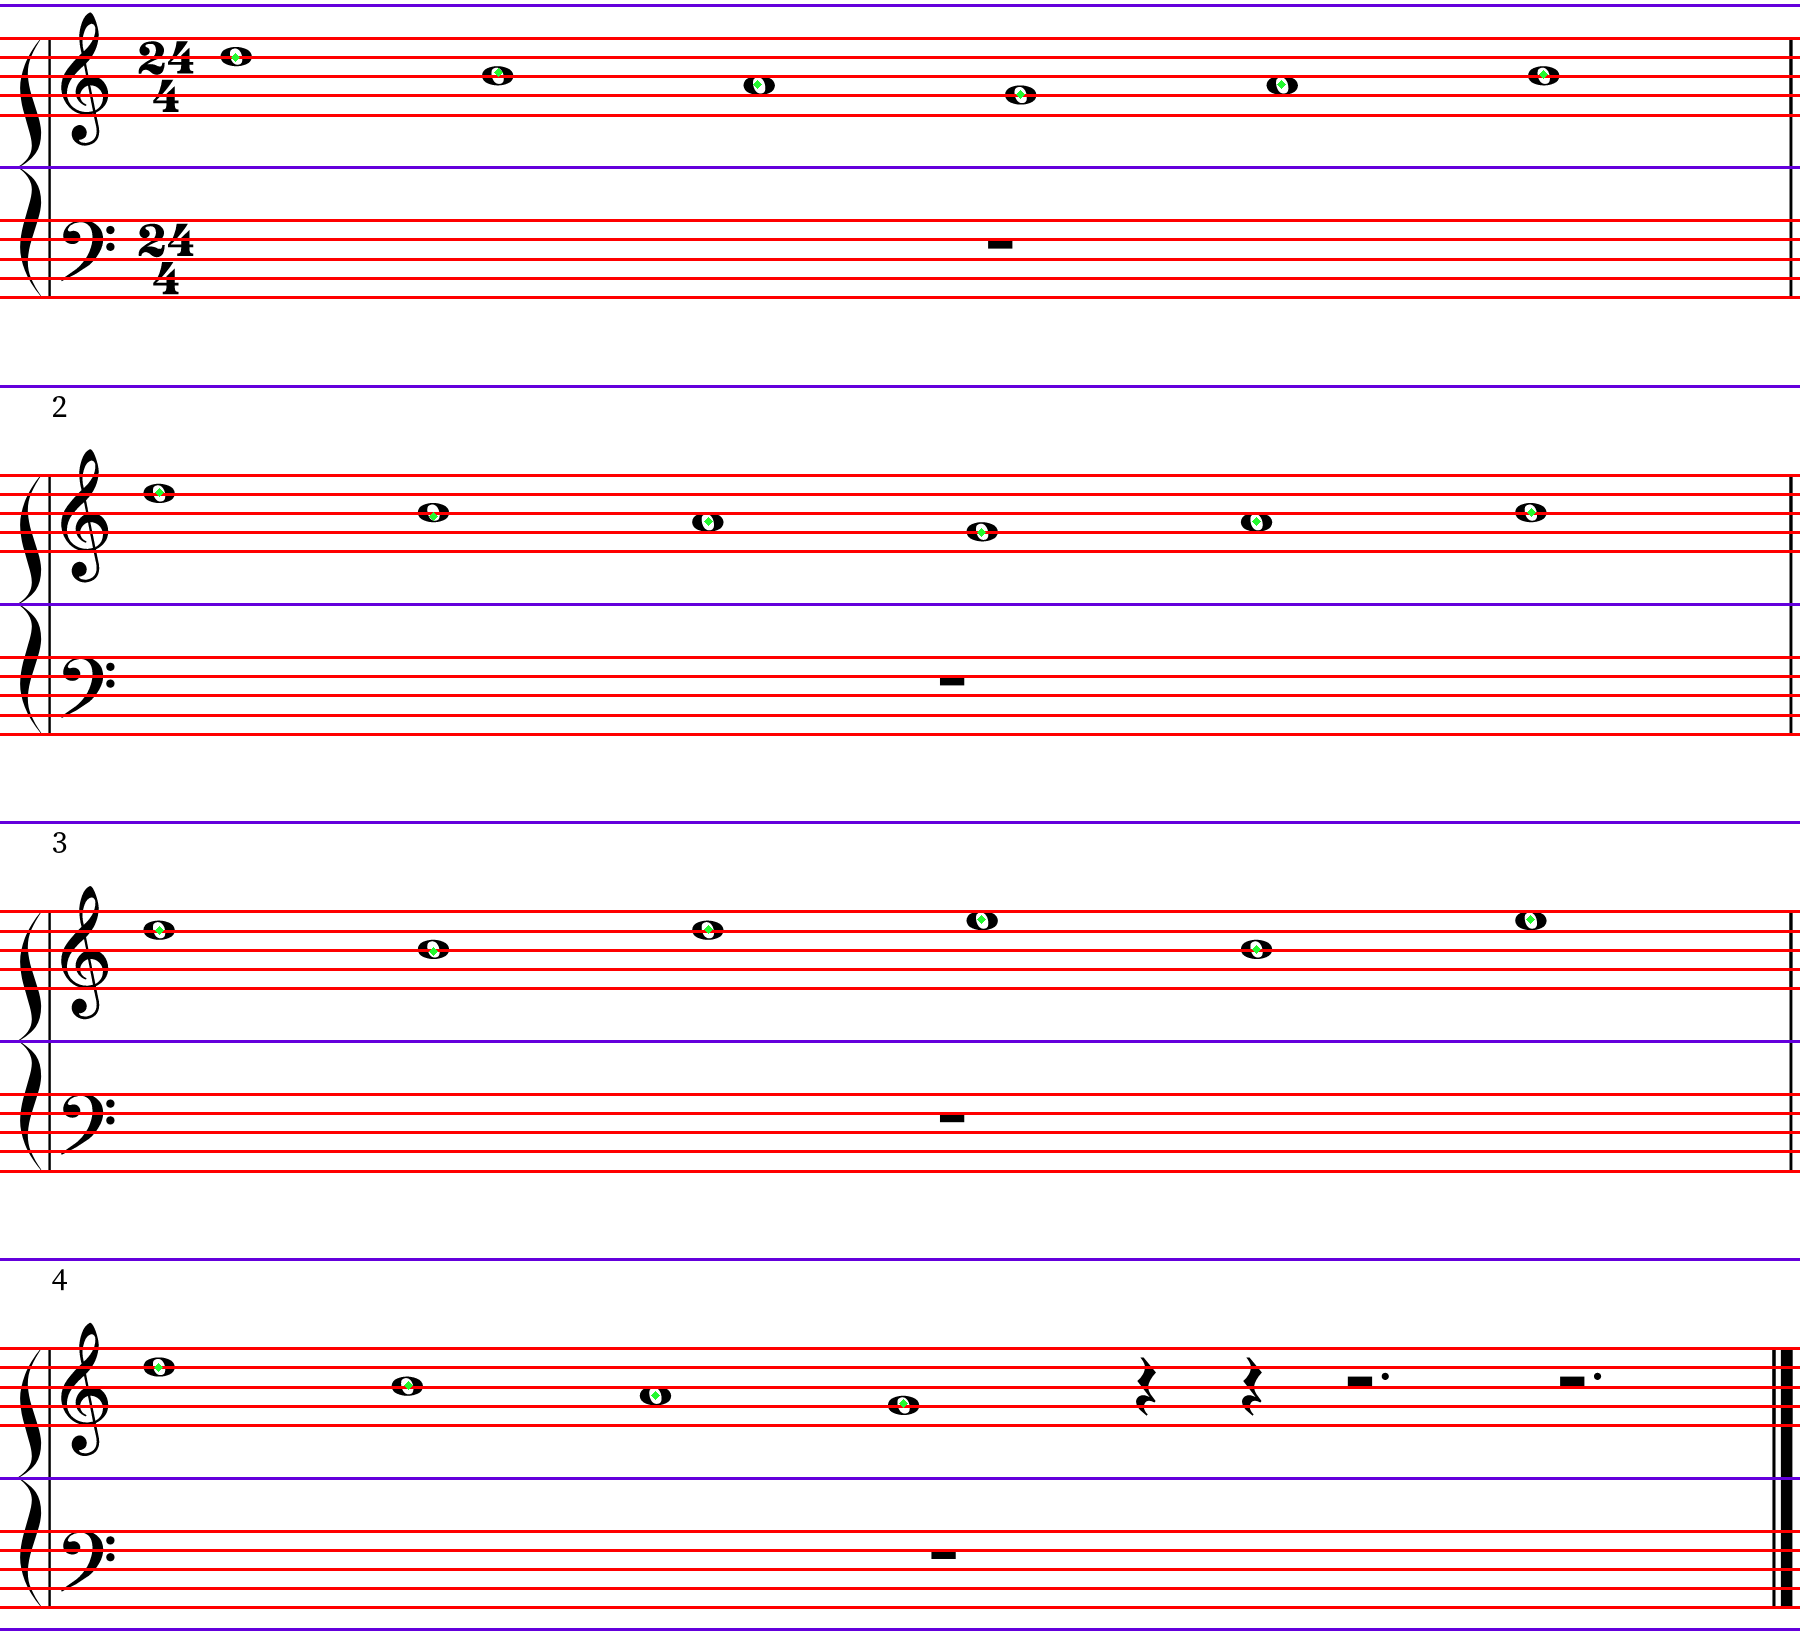

In [ ]:
# we put what we detected into a new image
J = np.zeros((I.shape[0],I.shape[1],3), np.uint8)
cimg = cv2.cvtColor(I,cv2.COLOR_GRAY2BGR)
for i in range(len(linelist)):
  cv2.line(cimg, (0, linelist[i]), (I.shape[1], linelist[i]), (0, 0, 255), thickness=2)
for i in range(note_pos.shape[0]):
    # draw the center of the circle
    cv2.circle(cimg,(int(note_pos[i,1]), int(note_pos[i,0])),2,(47,249,36),3)
for i in range(len(limit)):
  cv2.line(cimg, (0, limit[i]), (I.shape[1], limit[i]), (220, 0, 100), thickness=2)
cv2_imshow(cimg)
detect = cimg